## ACL20 Dataset

In [1]:
import pandas as pd
df = pd.read_csv('../test_data/Dataset ACL20/arguments.csv')
df.head()

Topic ID  Argument ID  Discussion ID  \
0        10            4          15859   
1        10            6          33373   
2        15            6           1349   
3         8           14          11861   
4        13            3          24960   

                                             Premise  Relevance  Is Argument?  \
0  My opponent is using a huge logical fallacy; h...   0.804470          True   
1  Although marijuana has been proven as a altern...   0.491689          True   
2  Not ALL commercials are inappropriate, and I c...  -2.010559          True   
3  It is possible to keep a balance between inter...  -0.446654          True   
4  Good for him. Now before you pontificate on ab...  -4.000000         False   

   Rhetorical Quality  Logical Quality  Dialectical Quality  Text Length  \
0            1.535072         0.952268             0.881800          234   
1            0.072041        -0.801151            -0.627380           48   
2           -0.683563         1.437088            -0.246909          232   
3            1.208935         0.019401            -0.006188          109   
4           -4.000000        -4.000000            -4.000000           47   

   Stance  Combined Quality  
0    True          1.295937  
1   False         -0.525441  
2   False          0.233194  
3    True          0.479949  
4    True         -4.000000

### Aggregation by Topic
Mean relevance, quality and length of arguments

In [2]:
aggregate = df.where(df['Is Argument?'] == True).groupby('Topic ID') \
       .agg({'Topic ID':'size', 'Relevance':'mean', 'Combined Quality':'mean', 'Text Length':'mean'}) \
       .rename(columns={'Topic ID':'count','Relevance':'mean_relevance', 'Combined Quality':'mean_quality', 'Text Length':'mean_length'}) \
       .reset_index()
aggregate

Topic ID  count  mean_relevance  mean_quality  mean_length
0        1.0     69       -0.294797      0.015478   174.347826
1        2.0     61       -1.005558     -0.064487   145.737705
2        3.0     75       -1.643563     -0.003158   143.506667
3        4.0     60       -0.071317      0.020347   122.833333
4        5.0     70       -0.196429      0.008768   151.571429
5        6.0     58        0.243621      0.015677   172.051724
6        7.0     53       -0.608946      0.000747   115.490566
7        8.0     77       -0.810211     -0.022836   160.519481
8        9.0     55       -0.082691      0.015082   148.236364
9       10.0     73        0.033229     -0.004262   121.972603
10      11.0     67        0.671421     -0.048927   145.567164
11      12.0     71        0.852929      0.009191   126.676056
12      13.0     53        0.651030      0.001007   169.905660
13      14.0     71        0.826497      0.015738   166.830986
14      15.0     72        0.787093      0.017799   152.055556
15      16.0     62        0.269715      0.008418   104.645161
16      17.0     57       -1.028317      0.004793   150.807018
17      18.0     81        0.831500     -0.011129   149.543210
18      19.0     55        0.144786      0.001257   159.418182
19      20.0     31        0.542137      0.057088   103.000000

### Correlation Matrix

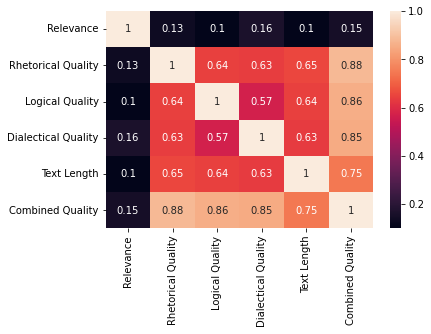

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


numerical = df.where(df['Is Argument?'] == True)[['Relevance', 'Rhetorical Quality', 'Logical Quality', 'Dialectical Quality', 'Text Length', 'Combined Quality']]
sn.heatmap(numerical.corr(), annot=True)
plt.show()

## Word Cloud
Get an overview of the topic by looking at the corresponding word cloud.

<IPython.core.display.Javascript object>


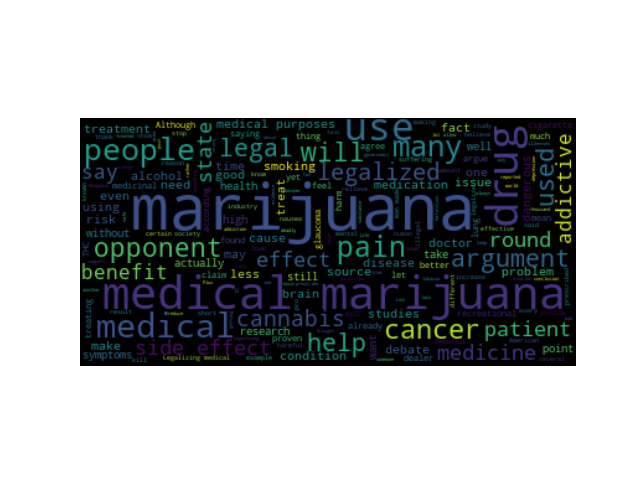

(-0.5, 399.5, 199.5, -0.5)

In [9]:
from wordcloud import WordCloud
#import nltk
#from nltk.corpus import stopwords
#nltk.download('punkt')
#nltk.download('stopwords')
#from nltk.tokenize import word_tokenize
%matplotlib notebook


text = df.where(df['Topic ID'] == 10)['Premise'].dropna().tolist()
text = ' '.join(text)
#text_tokens = word_tokenize(text)
#tokens_without_sw = [word for word in text_tokens if not word in stopwords.words() and len(word) > 3]
#text = ' '.join(tokens_without_sw)
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Touche 2020 Dataset
Extracted mean argument relevancy and number of arguments per topic. \
No real insight to Touche 2020 Dataset without analyzing the args.me corpus.


In [5]:
import xml.etree.ElementTree as ET

topics = ET.parse('../test_data/Dataset Touche 2020/topics.xml')
root = topics.getroot()

args = pd.read_csv('../test_data/Dataset Touche 2020/relevance-args-v2.qrels', sep=' ',
                   names=['qid', 'Q0', 'docid', 'relevancy'])
args = args.groupby('qid') \
       .agg({'qid':'size', 'relevancy':'mean'}) \
       .rename(columns={'qid':'count','relevancy':'mean_relevancy'}) \
       .reset_index()

In [6]:
print(args.head())
print('Total mean relevancy:')
print(args['mean_relevancy'].mean())

   qid  count  mean_relevancy
0    1     46        2.173913
1    2     50        1.860000
2    3     47        1.914894
3    4     44        2.909091
4    5     48        2.583333
Total mean relevancy:
2.616868792279035


In [7]:
# Print all topics with mean relevancy
print('Print all topics:')
for elem in root:
    print(elem[1].text)
    qid = int(elem[0].text)
    print(args.loc[args['qid'] == qid])     

Print all topics:
Should Teachers Get Tenure?
   qid  count  mean_relevancy
0    1     46        2.173913
Is Vaping with E-Cigarettes Safe?
   qid  count  mean_relevancy
1    2     50            1.86
Should Insider Trading Be Allowed?
   qid  count  mean_relevancy
2    3     47        1.914894
Should Corporal Punishment Be Used in Schools?
   qid  count  mean_relevancy
3    4     44        2.909091
Should Social Security Be Privatized?
   qid  count  mean_relevancy
4    5     48        2.583333
Is a College Education Worth It?
   qid  count  mean_relevancy
5    6     44        1.636364
Should Felons Who Have Completed Their Sentence Be Allowed to Vote?
   qid  count  mean_relevancy
6    7     49        2.693878
Should Abortion Be Legal?
   qid  count  mean_relevancy
7    8     48           2.875
Should Students Have to Wear School Uniforms?
   qid  count  mean_relevancy
8    9     45        2.444444
Should Any Vaccines Be Required for Children?
   qid  count  mean_relevancy
9   10     